# Exploratory Data Analysis Notebook

Before starting thinking about algorithm selection it is important to understand the available data. In this exploratory part, I'll explore the properties and schema of the data to identify potential challenges and the right tools to extract the most valuable features to use for a model.

## Importing Packages

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

from wordcloud import WordCloud

## Loading Raw Data

In [2]:
maps_df = pd.read_csv("../data/raw/public_maps.csv", dtype={'idea_parent_id': 'Int32'})

In [3]:
maps_df.head()

,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title
0,116533,PFK/Risikomanagement,50,Business,116533,<NA>,My first mindmap
1,116533,PFK/Risikomanagement,50,Business,116534,116533,Ideas for my novel ...
2,116533,PFK/Risikomanagement,50,Business,116535,116533,Welcome again!
3,116533,PFK/Risikomanagement,50,Business,116536,116535,We hope you\'ll have fun\nwith MindMeister ...
4,116533,PFK/Risikomanagement,50,Business,116537,116535,... and some great ideas too!


## Overview of the Data

The provided data has almost no null values, which means data imputation won't be necessary and we can drop the few rows with null values if there are no other features to extract.

In [4]:
maps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13560 entries, 0 to 13559
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   map_id             13560 non-null  int64 
 1   map_title          13560 non-null  object
 2   map_rating         13560 non-null  int64 
 3   map_category_name  13560 non-null  object
 4   idea_id            13560 non-null  int64 
 5   idea_parent_id     13098 non-null  Int32 
 6   idea_title         13560 non-null  object
dtypes: Int32(1), int64(3), object(3)
memory usage: 702.0+ KB


## Map Rating Distribution

From the histogram and statistical information we can say that the distribution of ratings is heavily skewed left. Meaning that just predicting a rating of "50" would yield a model with a MAE of almost zero. Given this finding, creating a model to predict the rating wouldn't provide any value given the unbalanced ratings.

In [5]:
maps_df['map_rating'].describe()

count    13560.000000
mean        49.518732
std          3.067104
min         10.000000
25%         50.000000
50%         50.000000
75%         50.000000
max         50.000000
Name: map_rating, dtype: float64

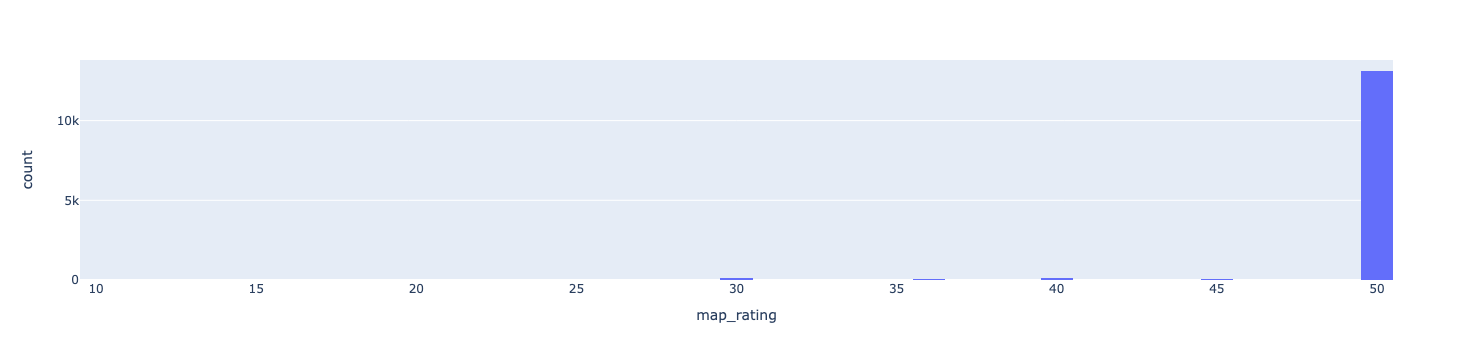

In [7]:
fig = px.histogram(maps_df, x="map_rating")
fig.show()

## Map Category Distribution

Given the distribution of the categories of the mindmaps a model to classify the maps is definitely feasible. There are some under-represented categories but in general a model could learn to classify the maps with satisfactory accuracy.

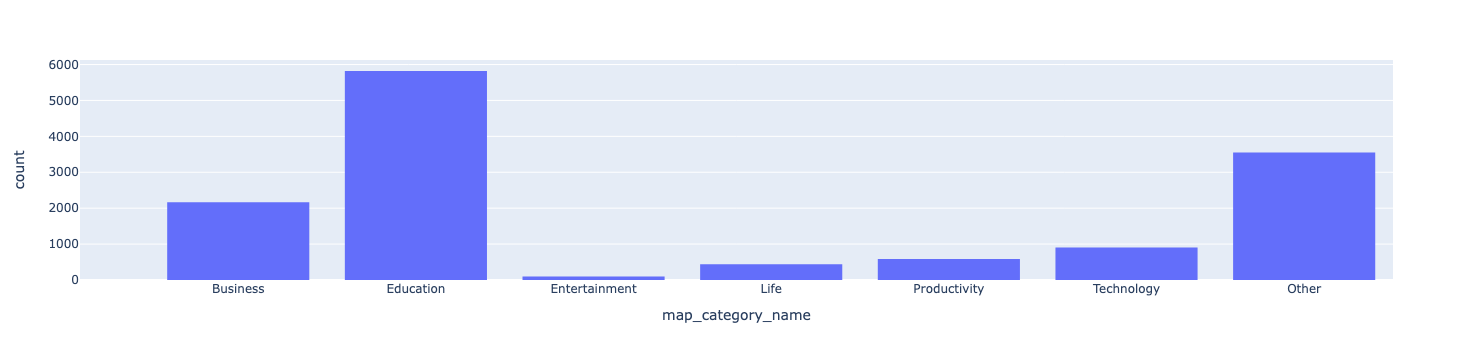

In [9]:
fig = px.histogram(maps_df, x="map_category_name", category_orders=dict(category=maps_df["map_category_name"].unique()))
fig.show()

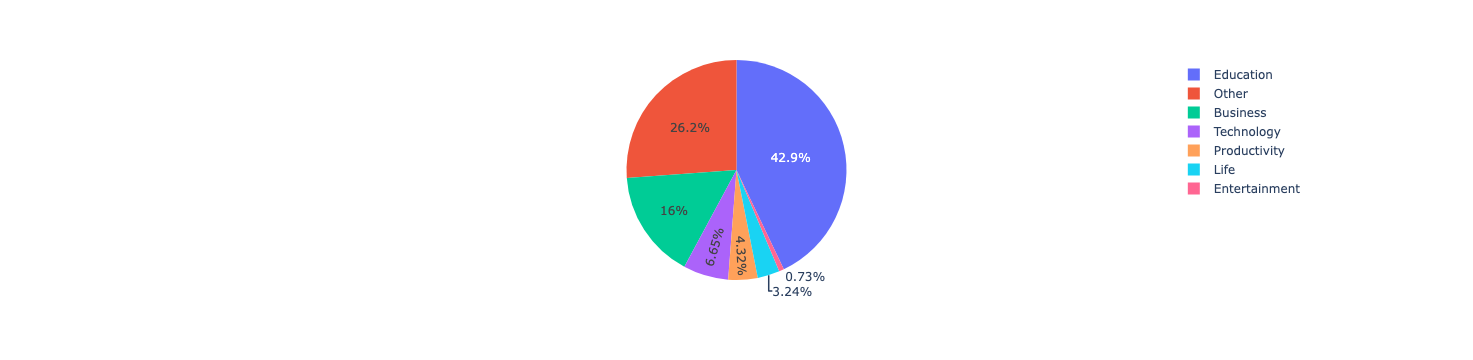

In [17]:
s = maps_df["map_category_name"]
fig = px.pie(s, values=s.value_counts().values, names=s.value_counts().index)
fig.show()

## Exploring "idea_title"

Exploring this column we can notice that there is a variety of languages, character sets and special characters in the titles. This requires NLP and text processing to extract features that can help to train a model to predict the category of the mindmap.

In [29]:
for title, category in maps_df[['idea_title', 'map_category_name']].sample(25).values:
    print(f"{title}, Category: {category}")

ImmoScout, Category: Technology
効率的な繰り返しで知識強化, Category: Life
Agrobac, Category: Other
eMail-Benachrichtigungen, Category: Education
New node, Category: Education
Vernissage, Category: Other
60%, Category: Other
Country, Category: Other
Vereine, Category: Other
Punch-out, Category: Other
UI, Category: Technology
The Big Book of Illustration Ideas, Category: Education
Editoras Nacionais + Presentes, Category: Education
ABC, Category: Business
Arvoden, Category: Education
Tools und Gadgets, Category: Business
Get started!, Category: Business
Google Account, Category: Education
Internetseiten, Category: Education
We have had an idea of individually lighting\rthe labels on the wine bottles with LED\'s on\rstalks.  This could focus peoples attention\ron the bottles., Category: Other
Goethe-Institute?, Category: Other
ENTER to add siblings, Category: Education
Willkommen!, Category: Business
Wetpaint, Category: Business
考えをまとめるのに便利なメモソフト, Category: Business


### Word Cloud for "idea_title"

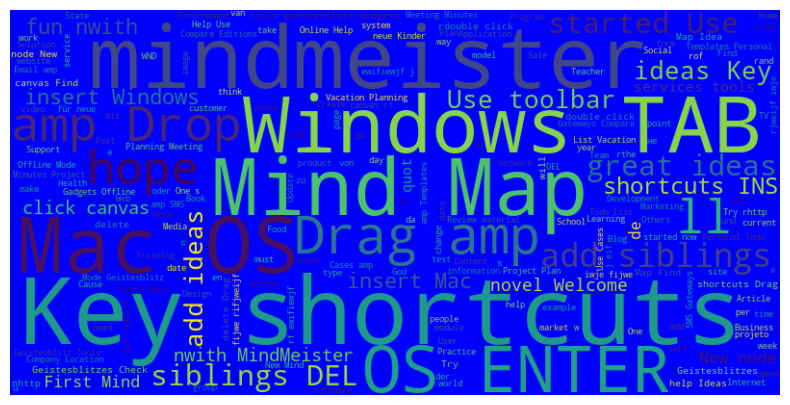

In [33]:
text_corpus = ' '.join(maps_df['idea_title'].values)
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='blue').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Exploring "map_title"

Exploring the "map_title" we can observe a variety of languages. This makes it challenging to use traditional NLP approaches since those rely in a mono lingual approach.

In [34]:
for title, category in maps_df[['map_title', 'map_category_name']].sample(25).values:
    print(f"{title}, Category: {category}")

Medios de comunicación\rmasiva, Category: Business
PROCESOS CULTURALES, Category: Other
William Robert (Bill) Dixon, Category: Entertainment
Gestión educativa, Category: Education
Tipos De Empresas , Category: Education
LEGAL RESEARCH TOOLS (Dr.Behnam Rastegari) Download\rmy papers at:\rhttps://figshare.com/authors/Behnam_Rastegari/2572795, Category: Education
Danza contemporánea, Category: Education
INFORMATION EXTRATION, Category: Other
7 навыков\rвысокоэффективных\rлюдей, Category: Productivity
ENFOQUES METODOLÓGICOS\rDE LA INVESTIGACIÓN, Category: Other
7 навыков\rвысокоэффективных\rлюдей, Category: Productivity
Réseaux sociaux , Category: Education
ДЕРЕВО\nстатей\nYUG.SU, Category: Other
Информационные\rресурсы, Category: Education
Prix littéraires avec jury\rd&#39;élèves, Category: Education
Módulo 2 (parte 1)\nBiología molecular, celular y\rtisular, Category: Other
Top Positive\rMindset Books\rfor Youth and\rStudents along\rwith Inspiring\rQuotes, Category: Education
LA Segunda 

### Word Cloud for "map_title"

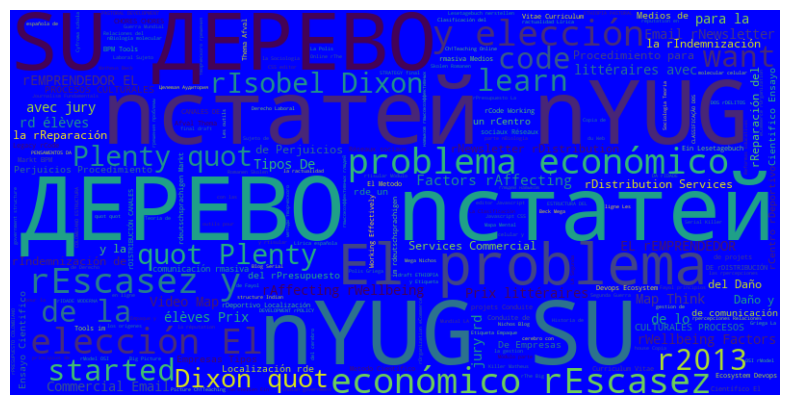

In [36]:
text_corpus = ' '.join(maps_df['map_title'].values)
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='blue').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()